# Scrape Instagram posts

In [93]:
# import wget
import pandas as pd  
import numpy  as np
# from   geopy.geocoders import Nominatim
# import altair as alt
import vega 
# from   vega_datasets import data # for state contours
from instascrape import Profile, scrape_posts
import matplotlib.pyplot as plt
from selenium.webdriver import Chrome

In [77]:
#alt.renderers.enable('notebook'); # for rendering in jupyter notebook

In [105]:
webdriver = Chrome("/Users/lisekerckhove/tajo-techatelier-insta/chromedriver")

In [106]:
my_session_id = '589504420%3Ah3VnXK1M543cu3%3A19'


In [107]:
headers = {
    "user-agent": "Mozilla/5.0 (Linux; Android 6.0; Nexus 5 Build/MRA58N) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Mobile Safari/537.36 Edg/87.0.664.57",
    "cookie": "sessionid={session_id};".format(session_id = my_session_id)
}

In [108]:
#joe = Profile('joebiden')
#joe.scrape()

lise = Profile('lisekerckhove')
lise.scrape(headers=headers)

#lise.get_posts()

In [109]:
lise_recent_posts = lise.get_recent_posts()

In [110]:
lise_recent_posts

[<Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>]

In [43]:
print(joe)

<Profile>


In [61]:
joe.json_dict

{'config': {'csrf_token': 'EiqcqPglEKkTuHFWszTq4xLqX8M3lhfX',
  'viewer': None,
  'viewerId': None},
 'country_code': 'BE',
 'language_code': 'en',
 'locale': 'en_US',
 'entry_data': {'ProfilePage': [{'logging_page_id': 'profilePage_5511100943',
    'show_suggested_profiles': False,
    'show_follow_dialog': False,
    'graphql': {'user': {'biography': 'Husband to @DrBiden, proud father and grandfather. Ready to build back better for all Americans. Official account is @POTUS.',
      'blocked_by_viewer': False,
      'restricted_by_viewer': None,
      'country_block': False,
      'external_url': 'http://joe.link/SC1Year',
      'external_url_linkshimmed': 'https://l.instagram.com/?u=http%3A%2F%2Fjoe.link%2FSC1Year&e=ATNK9USqndYuUF5l0SsvsNqLzBUAz3dQ9J0vk3oZcigCJssA-_ORKsMzdzITGhLoY2TqEQD9OCI763Hwm3GZsZvciMjAWmEn&s=1',
      'edge_followed_by': {'count': 18197705},
      'fbid': '17841405428318887',
      'followed_by_viewer': False,
      'edge_follow': {'count': 105},
      'follows_

In [62]:
kylie.json_dict

NameError: name 'kylie' is not defined

In [51]:
joes_recent_posts = joe.get_recent_posts()

#print(joes_recent_posts)
posts_data = [post.to_dict() for post in joes_recent_posts]
posts_df = pd.DataFrame(posts_data)
print(posts_df[['upload_date', 'comments', 'likes']])


           upload_date  comments    likes
0  2021-03-31 22:54:28     11693   243917
1  2021-03-14 16:11:54     37022   893395
2  2021-03-12 17:32:53     17878   648591
3  2021-03-01 17:32:20     21807   422243
4  2021-01-20 19:17:36    175607  4511545
5  2021-01-20 16:49:11     81690  4603569
6  2021-01-20 15:18:56    149048  6333262
7  2021-01-20 04:17:45     51907  3885718
8  2021-01-19 21:45:53     62141  3055789
9  2021-01-19 04:15:19      6028   375980
10 2021-01-18 23:34:08      7929   539443
11 2021-01-18 01:48:51     17772   704114


In [57]:
plt.style.use('seaborn-darkgrid')

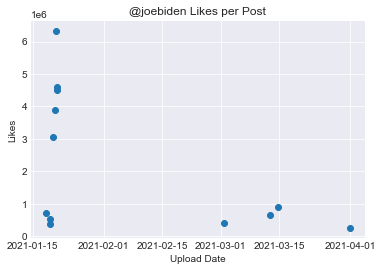

In [59]:
plt.scatter(posts_df.upload_date, posts_df.likes)  # Plot the data
plt.xlabel('Upload Date')              # Write labels
plt.ylabel('Likes')
plt.title('@joebiden Likes per Post')
plt.show()  

## Create dependencies

In [53]:
%load_ext watermark

# python, ipython, packages, and machine characteristics
%watermark -v -m -p wget,pandas,numpy,instascrape,altair,vega,vega_datasets,watermark 

# date
print (" ")
%watermark -u -n -t -z

Python implementation: CPython
Python version       : 3.7.4
IPython version      : 7.11.1

wget         : not installed
pandas       : 1.2.3
numpy        : 1.18.1
instascrape  : unknown
altair       : 4.1.0
vega         : 3.4.0
vega_datasets: not installed
watermark    : 2.2.0

Compiler    : Clang 11.0.0 (clang-1100.0.33.17)
OS          : Darwin
Release     : 20.2.0
Machine     : x86_64
Processor   : i386
CPU cores   : 16
Architecture: 64bit

 
Last updated: Sun Apr 11 2021 12:15:18CEST

